In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("menu.csv") # load the dataset

In [3]:
# Display basic information
print("Dataset Overview:\n", df.info())
print("\nFirst 5 Rows:\n", df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [4]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [5]:
# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())



Duplicate Rows: 0


In [6]:
# Summary Statistics
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
           Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5

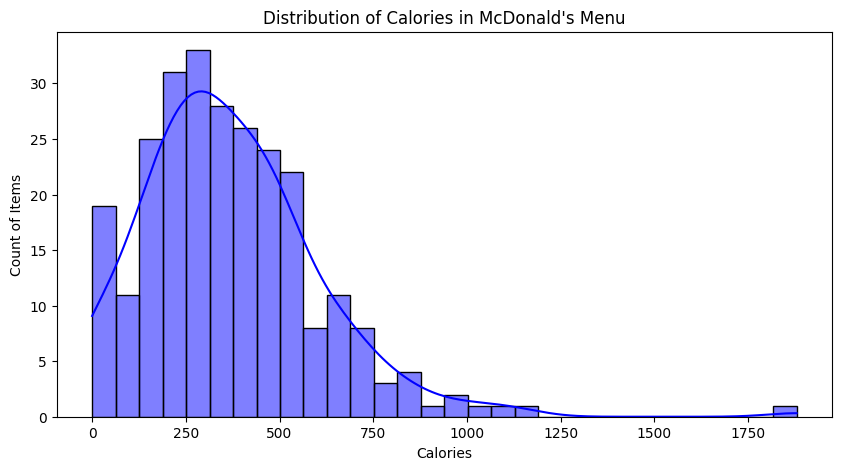

In [7]:
# Plot distribution of Calories
plt.figure(figsize=(10, 5))
sns.histplot(df["Calories"], bins=30, kde=True, color="blue")
plt.xlabel("Calories")
plt.ylabel("Count of Items")
plt.title("Distribution of Calories in McDonald's Menu")
plt.show()


In [8]:
# Top 10 highest calorie items
top_high_calories = df.nlargest(10, "Calories")[["Item", "Category", "Calories"]]
print("\nTop 10 High-Calorie Items:\n", top_high_calories)



Top 10 High-Calorie Items:
                                                   Item            Category  \
82                        Chicken McNuggets (40 piece)      Chicken & Fish   
32         Big Breakfast with Hotcakes (Large Biscuit)           Breakfast   
31       Big Breakfast with Hotcakes (Regular Biscuit)           Breakfast   
34   Big Breakfast with Hotcakes and Egg Whites (La...           Breakfast   
33   Big Breakfast with Hotcakes and Egg Whites (Re...           Breakfast   
81                        Chicken McNuggets (20 piece)      Chicken & Fish   
253               McFlurry with M&M’s Candies (Medium)  Smoothies & Shakes   
246                           Strawberry Shake (Large)  Smoothies & Shakes   
249                            Chocolate Shake (Large)  Smoothies & Shakes   
243                              Vanilla Shake (Large)  Smoothies & Shakes   

     Calories  
82       1880  
32       1150  
31       1090  
34       1050  
33        990  
81        940  


C:\Users\Samyam\AppData\Local\Temp\ipykernel_23812\2602450217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_high_calories["Item"], x=top_high_calories["Calories"], palette="Reds_r")


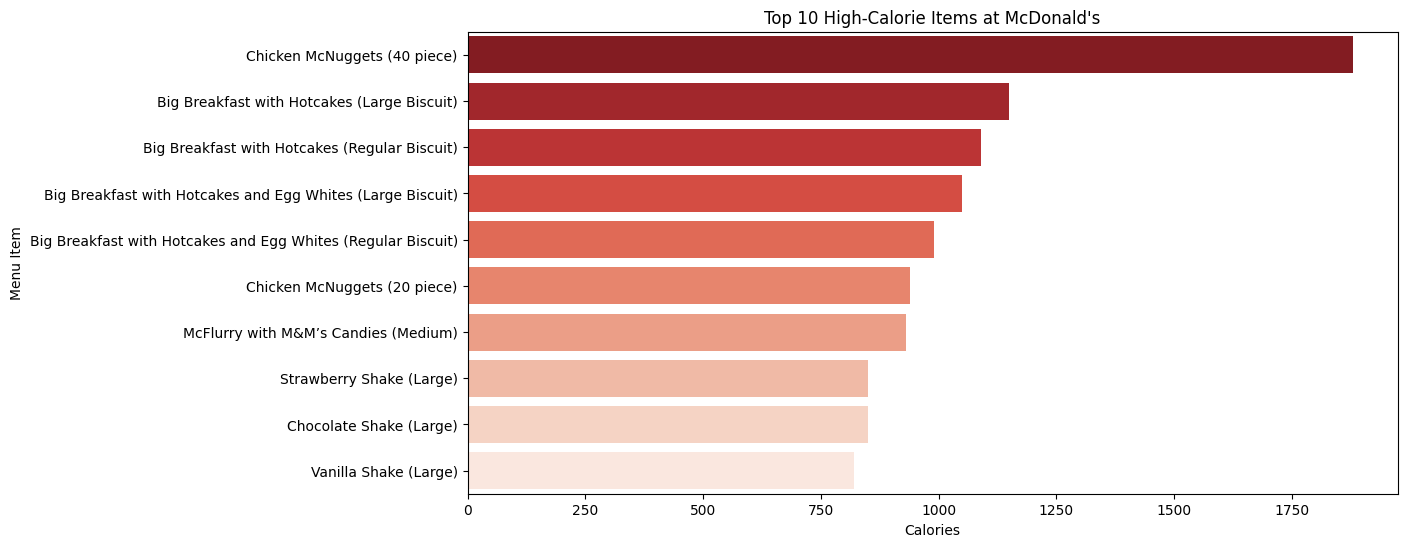

In [9]:
# Plot top high-calorie items
plt.figure(figsize=(12, 6))
sns.barplot(y=top_high_calories["Item"], x=top_high_calories["Calories"], palette="Reds_r")
plt.xlabel("Calories")
plt.ylabel("Menu Item")
plt.title("Top 10 High-Calorie Items at McDonald's")
plt.show()

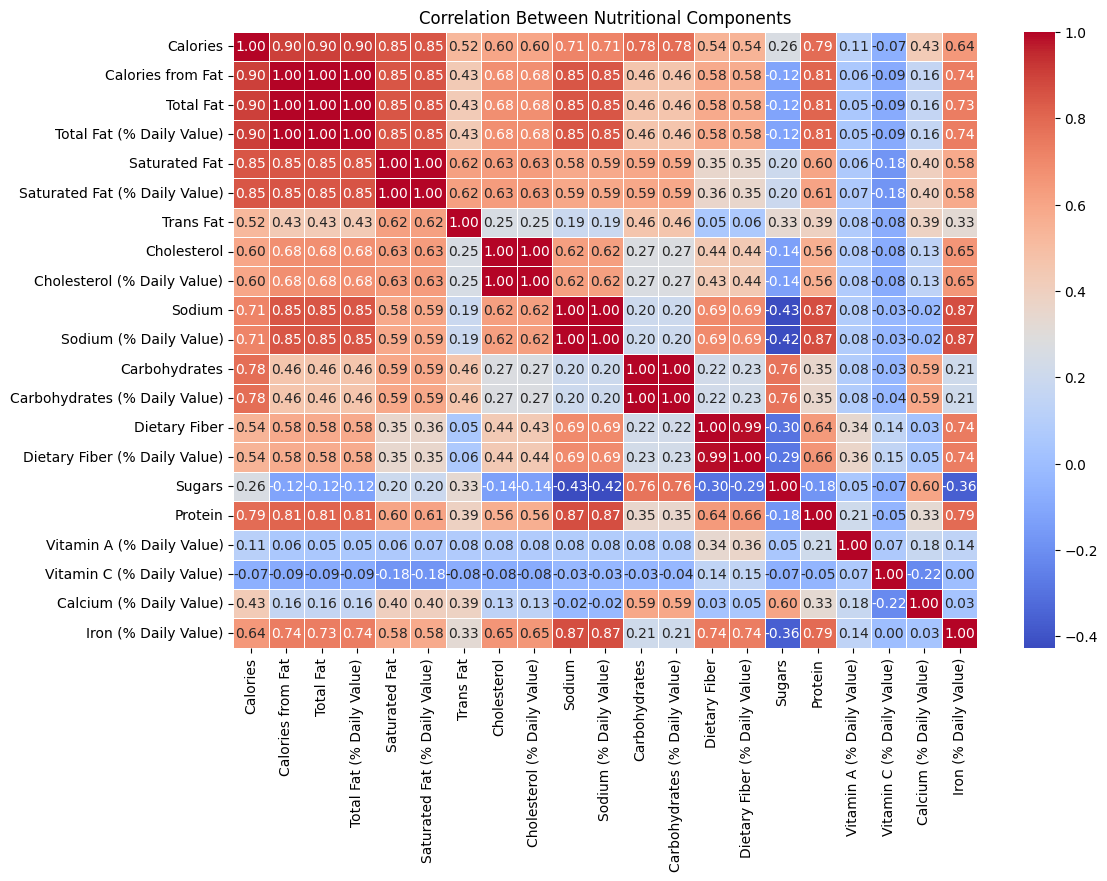

In [10]:
# Correlation Matrix
correlation_matrix = df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Nutritional Components")
plt.show()

C:\Users\Samyam\AppData\Local\Temp\ipykernel_23812\3107831051.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg_calories.index, y=category_avg_calories.values, palette="Blues_r")


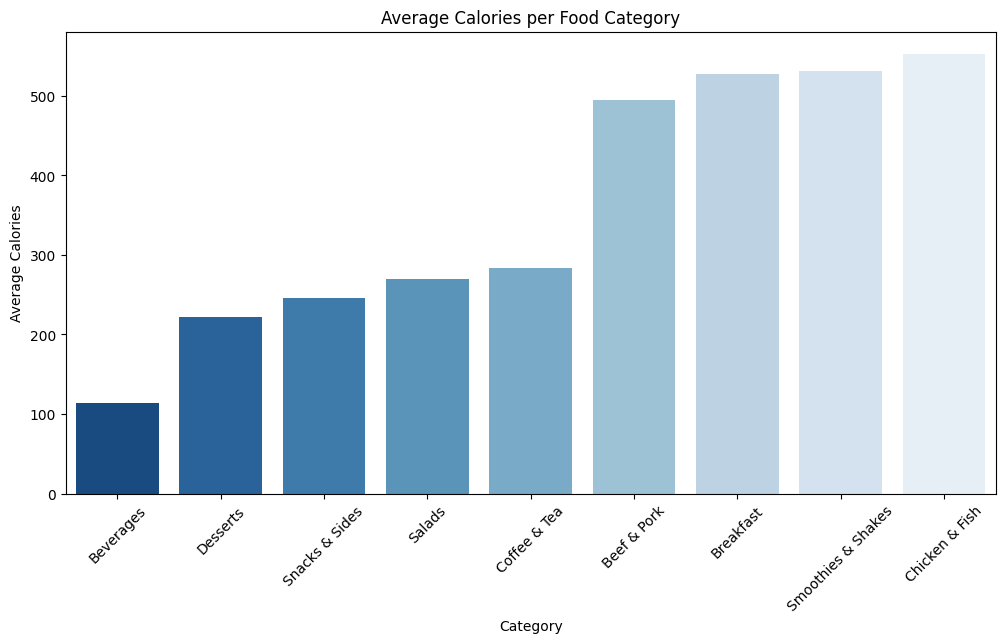

In [12]:
#additional Visualizations

# 1. Category-wise Average Calories
plt.figure(figsize=(12, 6))
category_avg_calories = df.groupby("Category")["Calories"].mean().sort_values()
sns.barplot(x=category_avg_calories.index, y=category_avg_calories.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Average Calories")
plt.title("Average Calories per Food Category")
plt.show()

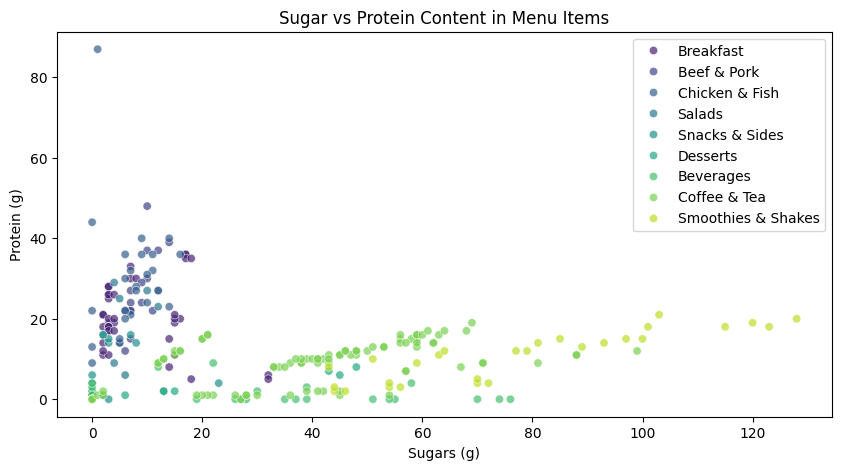

In [13]:
# 2. Sugar vs Protein Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Sugars"], y=df["Protein"], hue=df["Category"], palette="viridis", alpha=0.7)
plt.xlabel("Sugars (g)")
plt.ylabel("Protein (g)")
plt.title("Sugar vs Protein Content in Menu Items")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

C:\Users\Samyam\AppData\Local\Temp\ipykernel_23812\1220227356.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Category"], y=df["Total Fat"], palette="Set2")


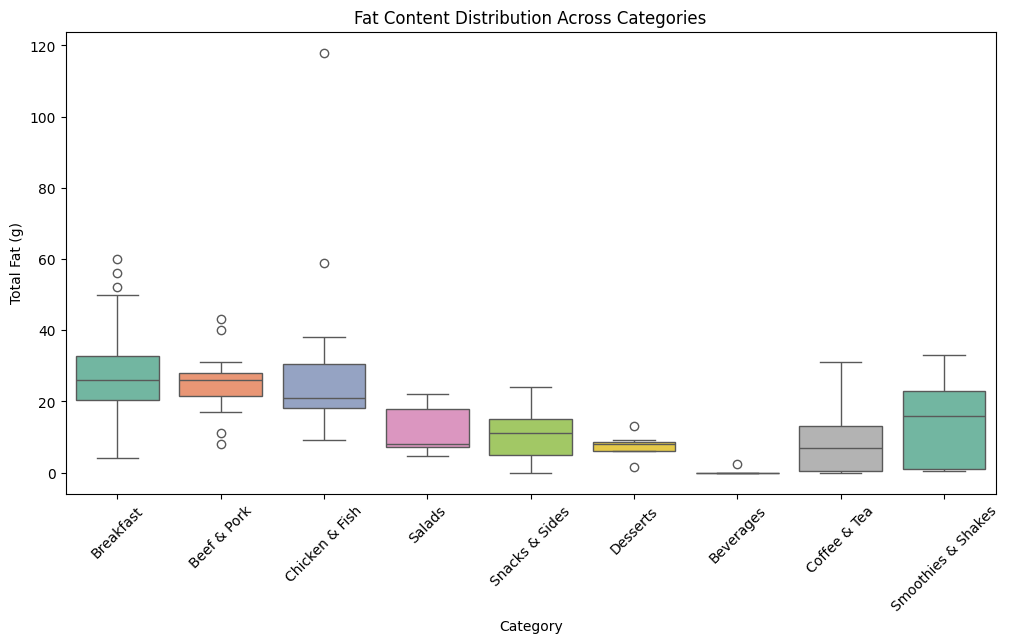

In [14]:
# 3. Fat Content Distribution by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Category"], y=df["Total Fat"], palette="Set2")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Total Fat (g)")
plt.title("Fat Content Distribution Across Categories")
plt.show()


In [ ]:
#